In [2]:
import os
import pandas as pd
import re


In [3]:
# data_folder = r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data" 
# all_dfs = []

# for file in os.listdir(data_folder):
#     if file.endswith(".xlsx") or file.endswith(".xls"):
#         file_path = os.path.join(data_folder, file)
#         print(f"📂 Checking {file_path}")
#         try:
#             xl = pd.ExcelFile(file_path)
#             for sheet in xl.sheet_names:
#                 print(f"   🔍 Trying sheet: {sheet}")
#                 df = xl.parse(sheet, skiprows=0, nrows=10)  # no skipping
#                 print(f"   🧾 First few rows:\n{df.head(2)}")
#                 print(f"   📄 Columns: {df.columns.tolist()}")
#         except Exception as e:
#             print(f"❌ Error reading {file}: {e}")


# pattern = re.compile(r"\d+\s*A[\s\-_]?2", re.IGNORECASE)

# for file in os.listdir(data_folder):
#     if pattern.search(file) and (file.endswith(".xlsx") or file.endswith(".xls")):
#         file_path = os.path.join(data_folder, file)
#         print(f"📂 Reading: {file}")
#         try:
#             df_raw = pd.read_excel(file_path, header=None)

#             # Detect where the real header starts (usually where 'District' or 'State' appears)
#             header_row_index = df_raw[df_raw.apply(lambda row: row.astype(str).str.contains('District|State', case=False).any(), axis=1)].index.min()

#             if pd.isna(header_row_index):
#                 print(f"⚠️ Skipped: No header found in {file}")
#                 continue

#             df = pd.read_excel(file_path, header=header_row_index)

#             # Drop completely empty columns
#             df.dropna(axis=1, how='all', inplace=True)

#             # Drop completely empty rows
#             df.dropna(axis=0, how='all', inplace=True)

#             all_dfs.append(df)
#         except Exception as e:
#             print(f"❌ Error processing {file}: {e}")

# # Combine all cleaned dataframes
# if all_dfs:
#     combined_df = pd.concat(all_dfs, ignore_index=True)
#     save_path = r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data\cleaned_decadal_data.csv"
#     os.makedirs(os.path.dirname(save_path), exist_ok=True)
#     combined_df.to_csv(save_path, index=False)
#     print(f"\n✅ Final shape: {combined_df.shape}")
#     print(f"💾 Cleaned data saved to: {save_path}")
# else:
#     print("⚠️ No valid data found.")

# updated header

# pattern = re.compile(r"\d+\s*A[\s\-_]?2", re.IGNORECASE)


# for file in os.listdir(data_folder):
#     if pattern.search(file) and (file.endswith(".xlsx") or file.endswith(".xls")):
#         file_path = os.path.join(data_folder, file)
#         print(f"📂 Reading: {file}")
#         try:
#             # Skip first few rows (usually messy headers are in top 4 rows)
#             df = pd.read_excel(file_path, skiprows=4)

#             # Drop completely empty columns
#             df.dropna(axis=1, how='all', inplace=True)

#             # Drop completely empty rows
#             df.dropna(axis=0, how='all', inplace=True)

#             # Keep only relevant columns (manually filtered)
#             keep_cols = ['State', 'District', 'Census Year', 'Persons', 'Males', 'Females']
#             found_cols = [col for col in df.columns if any(k.lower() in str(col).lower() for k in keep_cols)]

#             df = df[found_cols]

#             all_dfs.append(df)
#         except Exception as e:
#             print(f"❌ Error processing {file}: {e}")

# # Combine all cleaned dataframes
# if all_dfs:
#     combined_df = pd.concat(all_dfs, ignore_index=True)
#     save_path = r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data\cleaned_decadal_data.csv"
#     os.makedirs(os.path.dirname(save_path), exist_ok=True)
#     combined_df.to_csv(save_path, index=False)
#     print(f"\n✅ Final shape: {combined_df.shape}")
#     print(f"💾 Cleaned data saved to: {save_path}")
# else:
#     print("⚠️ No valid A2 files loaded.")

# -----------------------------------

# 📂 Set your folder path containing the downloaded A-2 files
data_folder = r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data"  # ⬅️ Change this to your actual folder
save_path = r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data\combined_decadal_data.csv"  # ⬅️ Desired save location

all_dfs = []

def clean_a2_file(file_path):
    try:
        # Load without headers first
        df_raw = pd.read_excel(file_path, header=None)

        # Find likely header row (row where "Census Year" or "Persons" appears)
        header_row_idx = df_raw[df_raw.apply(lambda row: row.astype(str).str.contains("Census", case=False).any(), axis=1)].index[0]

        df = pd.read_excel(file_path, header=header_row_idx)

        # Clean up column names
        df.columns = [str(col).strip().replace("\n", " ").title().replace(" ", "_") for col in df.columns]

        # Handle cases where column names vary slightly
        col_map = {
            'State/Union_Territory/District': 'Region',
            'State/Union_Territory/District_Code': 'District_Code',
            'District_Code': 'District_Code',
            'State_Code': 'State_Code',
            'Census_Year': 'Census_Year',
            'Persons': 'Population',
            'Males': 'Males',
            'Females': 'Females',
            'Variation_Since_The_Preceding_Census': 'Variation_Absolute'
        }

        # Rename only if the column is found
        df.rename(columns={k: v for k, v in col_map.items() if k in df.columns}, inplace=True)

        # Filter required columns (only if they exist)
        required_cols = ['State_Code', 'District_Code', 'Region', 'Census_Year', 'Population', 'Variation_Absolute', 'Males', 'Females']
        filtered_cols = [col for col in required_cols if col in df.columns]
        df = df[filtered_cols]

        # Drop rows where Population or Census_Year is missing
        df.dropna(subset=['Population', 'Census_Year'], inplace=True)

        return df

    except Exception as e:
        print(f"❌ Error reading {file_path}: {e}")
        return None






In [4]:
# file_path = r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data\18 A-2 ASSAM.xlsx"

# # Step 1: Skip first 5 rows where metadata exists, and assign column names manually
# df_raw = pd.read_excel(file_path, skiprows=5)

# # Step 2: Rename columns for clarity
# df_raw.columns = [
#     "State_Code", "District_Code", "Region", "Census_Year",
#     "Population", "Variation_Absolute", "Variation_Percent",
#     "Males", "Females"
# ]

# # Step 3: Drop any rows where Census Year is NaN (i.e., still metadata or garbage)
# df_cleaned = df_raw[df_raw["Census_Year"].notna()].copy()

# # Step 4: Drop rows where Population is NaN or non-numeric (optional)
# df_cleaned = df_cleaned[df_cleaned["Population"].apply(lambda x: str(x).isnumeric())]

# # Step 5: Convert columns to numeric where appropriate
# numeric_cols = ["State_Code", "District_Code", "Census_Year", "Population", "Males", "Females"]
# df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors="coerce")

# # Preview cleaned
# print("✅ Cleaned Data Preview:")
# print(df_cleaned.head())


In [5]:

# Set your combined file path (change if you saved to a different location)
# combined_file = r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data\combined_decadal_data.csv"

# # Load the combined data
# df = pd.read_csv(combined_file)

# print("📌 Raw Shape:", df.shape)
# print("🧾 Columns:", df.columns.tolist())

# # 1. Drop rows with missing key values
# df.dropna(subset=["Region", "Census_Year", "Population"], inplace=True)

# # 2. Convert data types
# df["Census_Year"] = df["Census_Year"].astype(int)
# df["Population"] = pd.to_numeric(df["Population"], errors='coerce')
# df["Males"] = pd.to_numeric(df["Males"], errors='coerce')
# df["Females"] = pd.to_numeric(df["Females"], errors='coerce')

# # 3. Handle variation column
# if "Variation_Absolute" in df.columns:
#     df["Variation_Absolute"] = df["Variation_Absolute"].replace("—", None)
#     df["Variation_Absolute"] = pd.to_numeric(df["Variation_Absolute"], errors='coerce')

# # 4. Remove duplicate rows
# df.drop_duplicates(inplace=True)

# # 5. Strip whitespace in Region names
# df["Region"] = df["Region"].str.strip().str.upper()

# # 6. Reset index
# df.reset_index(drop=True, inplace=True)

# # Final cleaned shape
# print("✅ Cleaned Shape:", df.shape)
# print(df.head())

# # 7. Save cleaned data
# cleaned_path = r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\cleaned_census_data.csv"
# df.to_csv(cleaned_path, index=False)
# print(f"💾 Cleaned data saved to: {cleaned_path}")


In [6]:
# import pandas as pd

# file = r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data\DDW_PCA0000_2011_Indiastatedist.xlsx"
# df = pd.read_excel(file, skiprows=1)  # Skip initial metadata

# df = pd.read_excel(file, header=4)

# # Print column names to verify
# print("✅ Cleaned Columns:", df.columns.tolist()[:10])
# print(df.head())

# # Print column names to verify
# df = df.rename(columns={
#     'Name': 'Region',
#     'TOT_P': 'Population_Total',
#     'TOT_M': 'Population_Male',
#     'TOT_F': 'Population_Female',
#     'Level': 'Level',
#     'TRU': 'Urban_Rural'
# })

# # Keep only District-level rows
# df = df[df['Level'] == 'DISTRICT']

# # Drop unwanted columns
# df = df[['State', 'District', 'Urban_Rural', 'Population_Total', 'Population_Male', 'Population_Female']]

# df.to_csv(r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data\census2011_cleaned.csv", index=False)
# print("✅ Saved cleaned file to: data/census2011_cleaned.csv")
# print(df.head())


In [7]:
import os
import requests
from bs4 import BeautifulSoup

save_folder = r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data"
os.makedirs(save_folder, exist_ok=True)

# Static download list for DDW-C20SC (Disability SC)
base_url = "https://censusindia.gov.in/nada/index.php/catalog/43434/download"

# Range of known file IDs (each state has a different file ID)
file_ids = range(47138, 47170)  # Covers many states; can expand if needed

for file_id in file_ids:
    filename = f"DDW-C20SC-{3200 + (file_id - 47138):04d}.xlsx"
    url = f"{base_url}/{file_id}/{filename}"
    file_path = os.path.join(save_folder, filename)
    
    try:
        r = requests.get(url)
        if r.status_code == 200 and len(r.content) > 10000:  # Make sure it's not an error page
            with open(file_path, "wb") as f:
                f.write(r.content)
            print(f"✅ Downloaded: {filename}")
        else:
            print(f"⚠️ Skipped: {filename} (Not found or too small)")
    except Exception as e:
        print(f"❌ Error downloading {filename}: {e}")


✅ Downloaded: DDW-C20SC-3200.xlsx
✅ Downloaded: DDW-C20SC-3201.xlsx
✅ Downloaded: DDW-C20SC-3202.xlsx
✅ Downloaded: DDW-C20SC-3203.xlsx
✅ Downloaded: DDW-C20SC-3204.xlsx
✅ Downloaded: DDW-C20SC-3205.xlsx
✅ Downloaded: DDW-C20SC-3206.xlsx
✅ Downloaded: DDW-C20SC-3207.xlsx
✅ Downloaded: DDW-C20SC-3208.xlsx
✅ Downloaded: DDW-C20SC-3209.xlsx
✅ Downloaded: DDW-C20SC-3210.xlsx
✅ Downloaded: DDW-C20SC-3211.xlsx
✅ Downloaded: DDW-C20SC-3212.xlsx
✅ Downloaded: DDW-C20SC-3213.xlsx
✅ Downloaded: DDW-C20SC-3214.xlsx
✅ Downloaded: DDW-C20SC-3215.xlsx
✅ Downloaded: DDW-C20SC-3216.xlsx
✅ Downloaded: DDW-C20SC-3217.xlsx
✅ Downloaded: DDW-C20SC-3218.xlsx
✅ Downloaded: DDW-C20SC-3219.xlsx
✅ Downloaded: DDW-C20SC-3220.xlsx
✅ Downloaded: DDW-C20SC-3221.xlsx
✅ Downloaded: DDW-C20SC-3222.xlsx
✅ Downloaded: DDW-C20SC-3223.xlsx
✅ Downloaded: DDW-C20SC-3224.xlsx
✅ Downloaded: DDW-C20SC-3225.xlsx
✅ Downloaded: DDW-C20SC-3226.xlsx
✅ Downloaded: DDW-C20SC-3227.xlsx
✅ Downloaded: DDW-C20SC-3228.xlsx
✅ Downloaded: 

In [8]:
import os
import pandas as pd

folder_path = r'C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data'

# Master column list — max possible
master_columns = [
    "Table_Name", "State_Code", "District_Code", "Area_Name",
    "Total_Rural_Urban", "Age_Group", "Total_Disabled_Persons",
    "Total_Disabled_Males", "Total_Disabled_Females",
    "Seeing_P", "Seeing_M", "Seeing_F",
    "Hearing_P", "Hearing_M", "Hearing_F",
    "Speech_P", "Speech_M", "Speech_F",
    "Movement_P", "Movement_M", "Movement_F",
    "Mental_Retardation_P", "Mental_Retardation_M", "Mental_Retardation_F",
    "Mental_Illness_P", "Mental_Illness_M", "Mental_Illness_F",
    "Other_Disability_P", "Other_Disability_M", "Other_Disability_F",
    "Multiple_Disability_P", "Multiple_Disability_M", "Multiple_Disability_F"
]

combined_df_list = []

for file in os.listdir(folder_path):
    if file.endswith(".xlsx") and file.startswith("DDW-C20SC"):
        file_path = os.path.join(folder_path, file)
        try:
            df = pd.read_excel(file_path, skiprows=5, header=None)
            col_count = df.shape[1]
            df.columns = master_columns[:col_count]
            combined_df_list.append(df)
            print(f"✅ Loaded: {file} with {col_count} columns")
        except Exception as e:
            print(f"❌ Failed: {file} → {e}")

# Save if any data collected
if combined_df_list:
    combined_df = pd.concat(combined_df_list, ignore_index=True)
    output_csv = os.path.join(folder_path, 'combined_c20sc_data.csv')
    combined_df.to_csv(output_csv, index=False)
    print(f"\n📦 Combined file saved to:\n{output_csv}")
else:
    print("⚠️ No data combined.")


✅ Loaded: DDW-C20SC-3200.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3201.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3202.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3203.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3204.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3205.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3206.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3207.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3208.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3209.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3210.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3211.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3212.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3213.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3214.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3215.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3216.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3217.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3218.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3219.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3220.xlsx with 33 columns
✅ Loaded: DDW-C20SC-3221.xlsx with

In [9]:
import pandas as pd

# Load your combined file
file_path = r'C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data\combined_c20sc_data.csv'
df = pd.read_csv(file_path)

# View the first few rows and column names
print(df.head())
print(df.columns.tolist())

# Drop fully empty rows (if any)
df.dropna(how='all', inplace=True)

# Remove unnecessary rows where Age_Group is 'Age Not Stated'
df = df[df['Age_Group'] != 'Age Not Stated']

# Standardize casing
df['Total_Rural_Urban'] = df['Total_Rural_Urban'].str.strip().str.title()
df['Area_Name'] = df['Area_Name'].str.replace('District-', '', regex=False).str.strip()

# Fix dtypes (make sure numbers are numbers)
num_cols = df.select_dtypes(include=['object']).columns[6:]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)



  Table_Name  State_Code  District_Code     Area_Name Total_Rural_Urban  \
0    C5020SC          32              0  State-KERALA             Total   
1    C5020SC          32              0  State-KERALA             Total   
2    C5020SC          32              0  State-KERALA             Total   
3    C5020SC          32              0  State-KERALA             Total   
4    C5020SC          32              0  State-KERALA             Total   

  Age_Group  Total_Disabled_Persons  Total_Disabled_Males  \
0     Total                   77033                 39421   
1       0-4                    1485                   811   
2       5-9                    2677                  1452   
3     10-19                    7516                  4255   
4     20-29                    9656                  5295   

   Total_Disabled_Females  Seeing_P  ...  Mental_Retardation_F  \
0                   37612     12030  ...                  2435   
1                     674       133  ...          

In [10]:
# import matplotlib.pyplot as plt

# state_totals = df[df['Total_Rural_Urban'] == 'Total'].groupby('Area_Name')['Total_Disabled_Persons'].sum().nlargest(15)

# state_totals.plot(kind='barh', title='Top 15 States by Disabled SC Population', color='skyblue')
# plt.xlabel('Total Disabled Persons')
# plt.ylabel('State')
# plt.tight_layout()
# plt.show()


In [11]:
gender_df = df[(df['Total_Rural_Urban'] == 'Total') & (df['Age_Group'] == 'Total')]

total_males = gender_df['Total_Disabled_Males'].sum()
total_females = gender_df['Total_Disabled_Females'].sum()

plt.pie([total_males, total_females],
        labels=['Males', 'Females'],
        autopct='%1.1f%%',
        colors=['dodgerblue', 'lightcoral'],
        startangle=140)
plt.title('Gender Split of Disabled SC Population (All India)')
plt.axis('equal')
plt.show()



NameError: name 'plt' is not defined

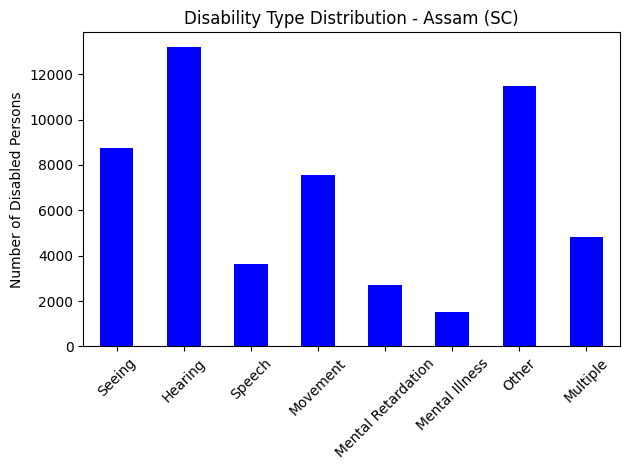

In [ ]:
# Standardize text fields
df['Area_Name'] = df['Area_Name'].str.upper().str.replace('STATE-', '').str.strip()
df['Age_Group'] = df['Age_Group'].str.strip().str.title()
df['Total_Rural_Urban'] = df['Total_Rural_Urban'].str.strip().str.title()

# Filter for Kerala
assam = df[
    (df['Area_Name'] == 'ASSAM') &
    (df['Age_Group'] == 'Total') &
    (df['Total_Rural_Urban'] == 'Total')
]

# Check if filtered data has rows
if assam.empty:
    print("⚠️ No data found for Kerala with given filters.")
else:
    # Disability type mapping
    disability_types = {
        'Seeing_P': 'Seeing',
        'Hearing_P': 'Hearing',
        'Speech_P': 'Speech',
        'Movement_P': 'Movement',
        'Mental_Retardation_P': 'Mental Retardation',
        'Mental_Illness_P': 'Mental Illness',
        'Other_Disability_P': 'Other',
        'Multiple_Disability_P': 'Multiple'
    }

    # Sum values
    data = assam[list(disability_types.keys())].sum()
    data.index = [disability_types[col] for col in data.index]

    # Plot
    data.plot(kind='bar', title='Disability Type Distribution - Assam (SC)', color='blue')
    plt.ylabel('Number of Disabled Persons')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [ ]:
#  State-wise Total Disabled Population
# state_summary = df[
#     (df['Total_Rural_Urban'] == 'Total') &
#     (df['Age_Group'] == 'Total')
# ].groupby('Area_Name')['Total_Disabled'].sum().reset_index().sort_values(by='Total_Disabled', ascending=False)

# print(state_summary.head())
print(df.columns.tolist())
# List of 6 'Person' disability columns
disability_cols = [
    'Seeing_P',
    'Hearing_P',
    'Speech_P',
    'Movement_P',
    'Mental_Retardation_P',
    'Mental_Illness_P',
    'Other_Disability_P',
    'Multiple_Disability_P'
]
# df['Total_Disabled'] = df[disability_cols].sum(axis=1)

# (df['Computed_Total_Disabled'] == df['Total_Disabled_Persons']).value_counts()
df['Total_Disabled'] = df[disability_cols].sum(axis=1)



['Table_Name', 'State_Code', 'District_Code', 'Area_Name', 'Total_Rural_Urban', 'Age_Group', 'Total_Disabled_Persons', 'Total_Disabled_Males', 'Total_Disabled_Females', 'Seeing_P', 'Seeing_M', 'Seeing_F', 'Hearing_P', 'Hearing_M', 'Hearing_F', 'Speech_P', 'Speech_M', 'Speech_F', 'Movement_P', 'Movement_M', 'Movement_F', 'Mental_Retardation_P', 'Mental_Retardation_M', 'Mental_Retardation_F', 'Mental_Illness_P', 'Mental_Illness_M', 'Mental_Illness_F', 'Other_Disability_P', 'Other_Disability_M', 'Other_Disability_F', 'Multiple_Disability_P', 'Multiple_Disability_M', 'Multiple_Disability_F', 'Computed_Total_Disabled']


In [ ]:
# state_summary = df[
#     (df['Total_Rural_Urban'] == 'Total') &
#     (df['Age_Group'] == 'Total')
# ].groupby('Area_Name')['Total_Disabled'].sum().reset_index().sort_values(by='Total_Disabled', ascending=False)

# print(state_summary.head())

state_summary = df[df['Age_Group'] == 'Total'].groupby('Area_Name')['Total_Disabled'].sum().reset_index()
state_summary = state_summary.sort_values(by='Total_Disabled', ascending=False)
print(state_summary.head())
# After your state-wise aggregation is done
state_summary.to_csv(r"C:\Users\MY PC\Downloads\Data analyst\Python\india_census_project\saved data\disability_data.csv", index=False)




          Area_Name  Total_Disabled
336  MADHYA PRADESH          585700
532      TAMIL NADU          508972
404          ODISHA          507558
339     MAHARASHTRA          433412
444       RAJASTHAN          414490


C:\Users\MY PC\AppData\Local\Temp\ipykernel_1960\949414621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Total_Disabled', y='Area_Name', palette='viridis')


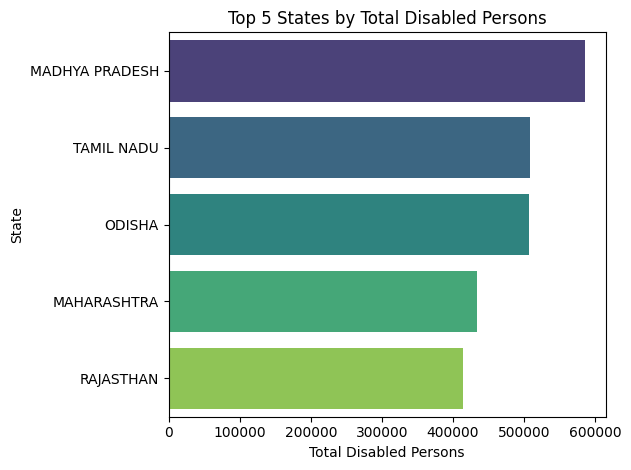

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top5 = state_summary.sort_values(by='Total_Disabled', ascending=False).head(5)
sns.barplot(data=top5, x='Total_Disabled', y='Area_Name', palette='viridis')
plt.title('Top 5 States by Total Disabled Persons')
plt.xlabel('Total Disabled Persons')
plt.ylabel('State')
plt.tight_layout()
plt.show()


C:\Users\MY PC\AppData\Local\Temp\ipykernel_1960\2966738411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom5, x='Total_Disabled', y='Area_Name', palette='magma')


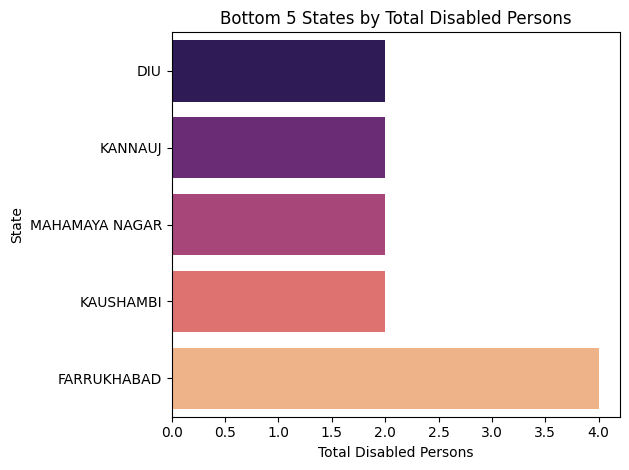

In [ ]:
bottom5 = state_summary.sort_values(by='Total_Disabled', ascending=True).head(5)
sns.barplot(data=bottom5, x='Total_Disabled', y='Area_Name', palette='magma')
plt.title('Bottom 5 States by Total Disabled Persons')
plt.xlabel('Total Disabled Persons')
plt.ylabel('State')
plt.tight_layout()
plt.show()


In [ ]:
disability_distribution = df[
    (df['Total_Rural_Urban'] == 'Total') & 
    (df['Age_Group'] == 'Total')
].groupby('Area_Name')[list(disability_types.keys())].sum().reset_index()

disability_distribution.head()


,Area_Name,Seeing_P,Hearing_P,Speech_P,Movement_P,Mental_Retardation_P,Mental_Illness_P,Other_Disability_P,Multiple_Disability_P
0,ADILABAD,2421,2284,617,2728,550,277,2856,801
1,AGRA,49,47,4,25,7,1,45,6
2,AHMADABAD,774,784,109,382,89,48,537,101
3,AHMADNAGAR,1553,1334,982,1878,432,208,1432,633
4,AIZAWL,611,1086,325,680,621,283,581,751


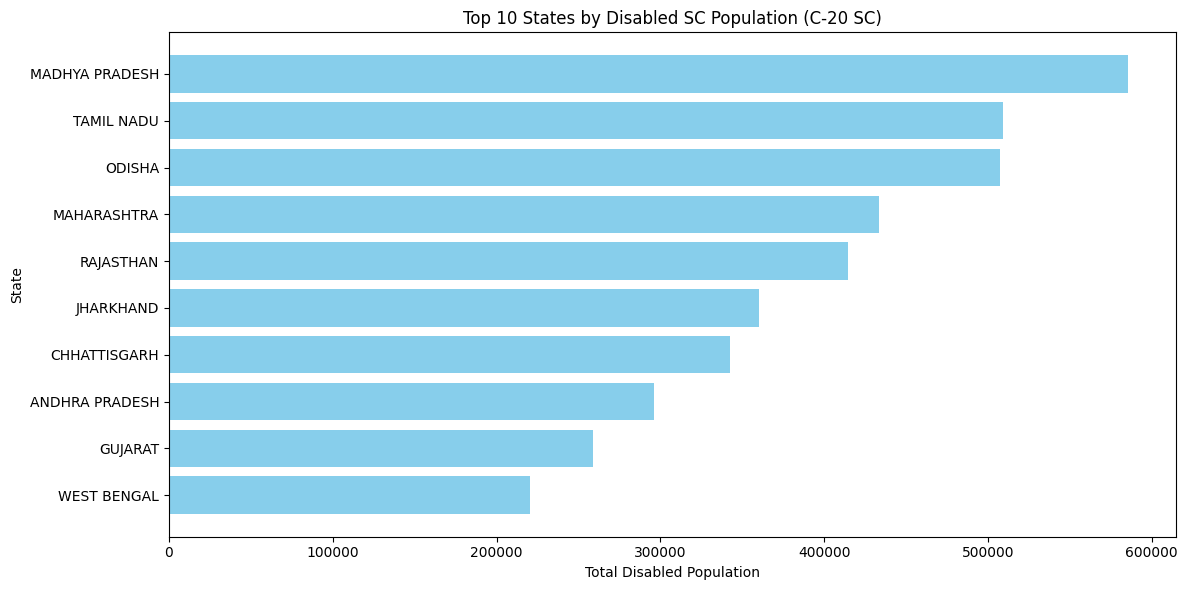

In [ ]:
import matplotlib.pyplot as plt

top_states = state_summary.head(10)

plt.figure(figsize=(12,6))
plt.barh(top_states['Area_Name'][::-1], top_states['Total_Disabled'][::-1], color='skyblue')
plt.title('Top 10 States by Disabled SC Population (C-20 SC)')
plt.xlabel('Total Disabled Population')
plt.ylabel('State')
plt.tight_layout()
plt.show()



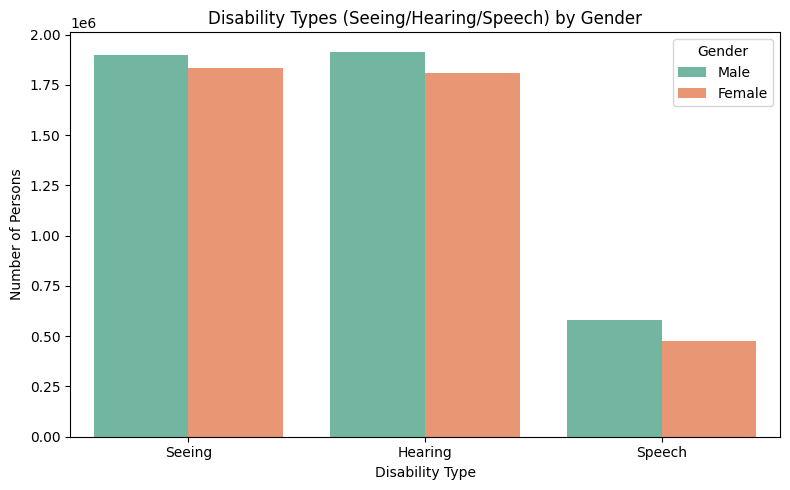

In [ ]:
# Sum across all states/districts
disability_gender_data = {
    'Disability_Type': ['Seeing', 'Hearing', 'Speech'],
    'Male': [
        df['Seeing_M'].sum(),
        df['Hearing_M'].sum(),
        df['Speech_M'].sum()
    ],
    'Female': [
        df['Seeing_F'].sum(),
        df['Hearing_F'].sum(),
        df['Speech_F'].sum()
    ]
}

gender_df = pd.DataFrame(disability_gender_data)
import seaborn as sns
import matplotlib.pyplot as plt

gender_df_melted = gender_df.melt(id_vars='Disability_Type', var_name='Gender', value_name='Count')

plt.figure(figsize=(8,5))
sns.barplot(data=gender_df_melted, x='Disability_Type', y='Count', hue='Gender', palette='Set2')
plt.title('Disability Types (Seeing/Hearing/Speech) by Gender')
plt.ylabel('Number of Persons')
plt.xlabel('Disability Type')
plt.tight_layout()
plt.show()

In [ ]:
gender_df['Total'] = gender_df['Male'] + gender_df['Female']
gender_df['% Male'] = round((gender_df['Male'] / gender_df['Total']) * 100, 2)
gender_df['% Female'] = round((gender_df['Female'] / gender_df['Total']) * 100, 2)


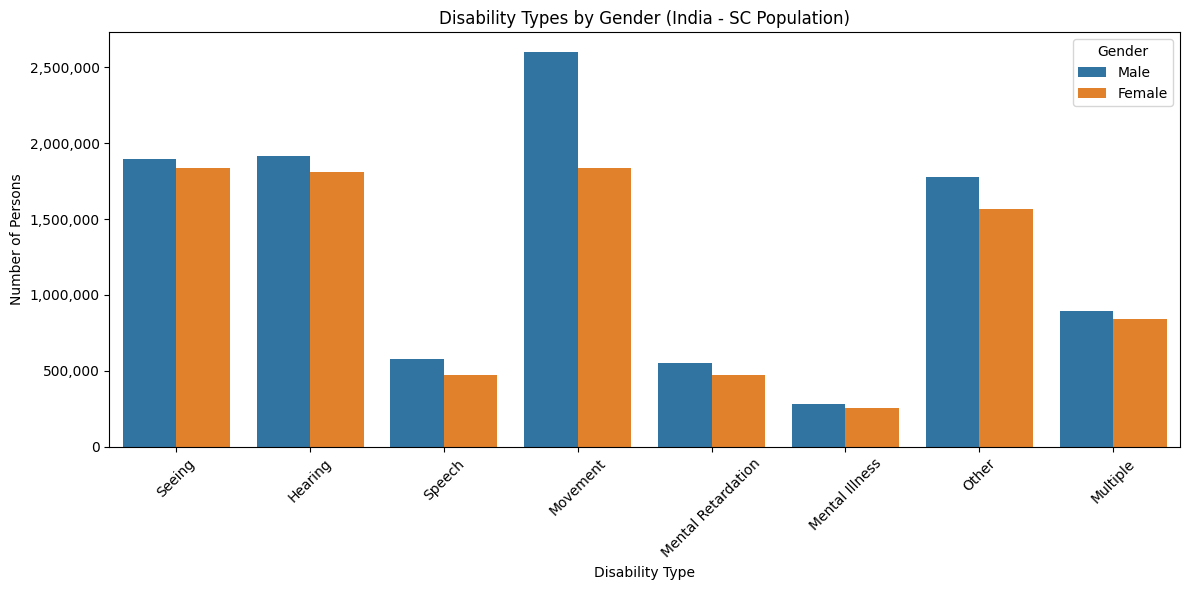

In [ ]:
# showing data as 2,00,000 instead of scientific notation of matplotlib
# patterns for all disabilities by gender
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Sample: Replace with your actual combined DataFrame
# df = pd.read_csv('your_cleaned_combined_file.csv')

# Sum totals across all states/districts
disability_totals = {
    'Disability': [],
    'Gender': [],
    'Count': []
}

disability_types = [
    ('Seeing', 'Seeing_M', 'Seeing_F'),
    ('Hearing', 'Hearing_M', 'Hearing_F'),
    ('Speech', 'Speech_M', 'Speech_F'),
    ('Movement', 'Movement_M', 'Movement_F'),
    ('Mental Retardation', 'Mental_Retardation_M', 'Mental_Retardation_F'),
    ('Mental Illness', 'Mental_Illness_M', 'Mental_Illness_F'),
    ('Other', 'Other_Disability_M', 'Other_Disability_F'),
    ('Multiple', 'Multiple_Disability_M', 'Multiple_Disability_F')
]

for label, male_col, female_col in disability_types:
    disability_totals['Disability'].append(label)
    disability_totals['Gender'].append('Male')
    disability_totals['Count'].append(df[male_col].sum())

    disability_totals['Disability'].append(label)
    disability_totals['Gender'].append('Female')
    disability_totals['Count'].append(df[female_col].sum())

# Create DataFrame for plotting
df_plot = pd.DataFrame(disability_totals)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Disability', y='Count', hue='Gender')
plt.title('Disability Types by Gender (India - SC Population)')
plt.xlabel('Disability Type')
plt.ylabel('Number of Persons')

# Format Y-axis with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\MY PC\AppData\Local\Temp\ipykernel_1960\3494675458.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_districts, y='Area_Name', x='Total_Disabled_Persons', palette='mako')


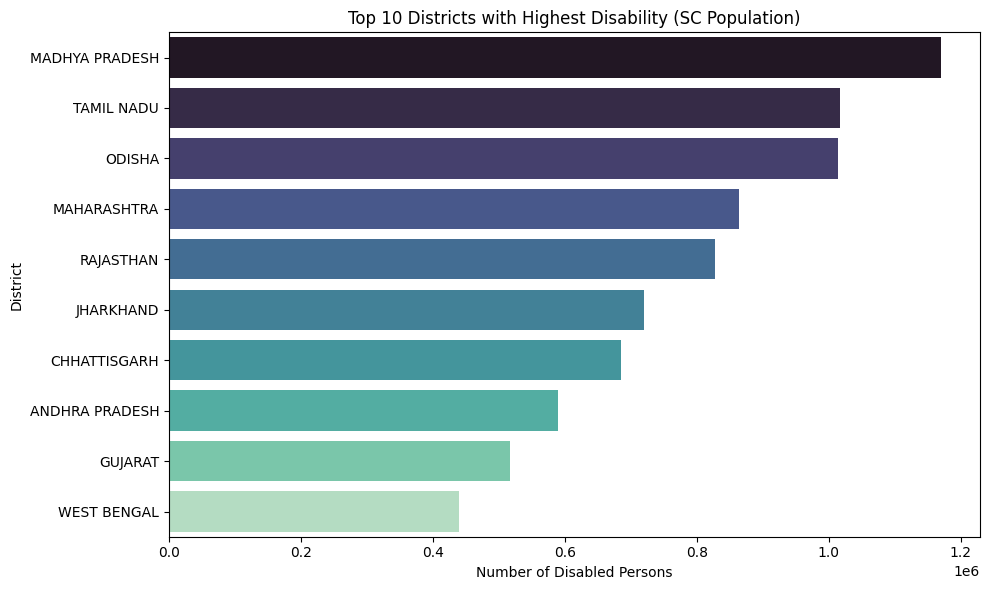

In [ ]:
top_districts = df.groupby('Area_Name')['Total_Disabled_Persons'].sum().nlargest(10).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=top_districts, y='Area_Name', x='Total_Disabled_Persons', palette='mako')
plt.title('Top 10 Districts with Highest Disability (SC Population)')
plt.xlabel('Number of Disabled Persons')
plt.ylabel('District')
plt.tight_layout()
plt.show()


C:\Users\MY PC\AppData\Local\Temp\ipykernel_1960\1977534652.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gap, x='Gender_Gap_Seeing', y='Area_Name', palette='flare')


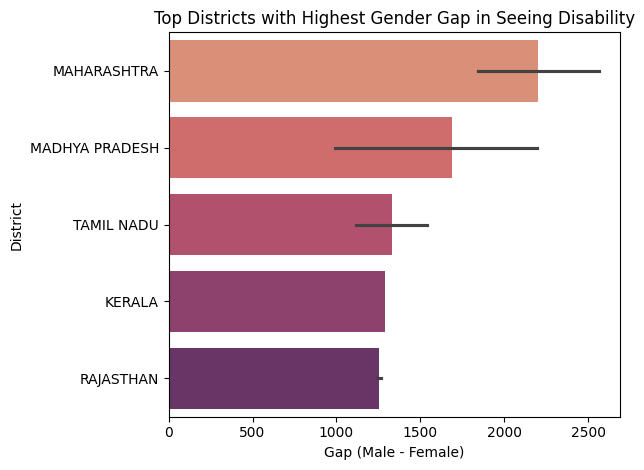

In [ ]:
# Gender Gap in a Disability Type
# Gender gap in 'Seeing'
df['Gender_Gap_Seeing'] = abs(df['Seeing_M'] - df['Seeing_F'])
top_gap = df[['Area_Name', 'Gender_Gap_Seeing']].sort_values(by='Gender_Gap_Seeing', ascending=False).head(10)

sns.barplot(data=top_gap, x='Gender_Gap_Seeing', y='Area_Name', palette='flare')
plt.title('Top Districts with Highest Gender Gap in Seeing Disability')
plt.xlabel('Gap (Male - Female)')
plt.ylabel('District')
plt.tight_layout()
plt.show()

# 📌 “We identified top 10 districts with the highest burden of disability among Scheduled Castes, and found significant gender-based gaps in disability types like vision and hearing. 
# These findings can inform district-level intervention strategies, especially where support facilities might not match the need.”
